In [25]:
import sys
# wtf?
sys.path.insert(0, '/usr/local/miniconda3/envs/py27/lib/python2.7/site-packages')

import imageio
import glob
import progressbar
import numpy as np
import pandas as pd
import optimus
import time
import random
from cStringIO import StringIO
import matplotlib.pyplot as plt
import PIL
from mpl_toolkits.mplot3d import Axes3D

# %matplotlib inline

import seaborn
# import mpld3

import json
import IPython.display

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import confusion_matrix

import dml.data as D
import dml.models as M

seaborn.set()
np.set_printoptions(precision=4, suppress=True)
# mpld3.enable_notebook()

pltargs = dict(interpolation='nearest', 
               aspect='auto', 
               origin='lower',
               cmap=plt.cm.hot)
reload(M)

<module 'dml.models' from 'dml/models.pyc'>

In [7]:
train = pd.read_json("/media/ejhumphrey/workspace/icml-dml/datasets/train.json")
valid = pd.read_json("/media/ejhumphrey/workspace/icml-dml/datasets/valid.json")
test = pd.read_json("/media/ejhumphrey/workspace/icml-dml/datasets/test.json")

In [3]:
index = test.index.tolist()
np.random.shuffle(index)
test2 = test.loc[index[:500]]

In [4]:
test2.shape

(500, 5)

In [5]:
graph = optimus.load(
    "/media/ejhumphrey/workspace/icml-dml/models"
    "/pitch-000/pitch-000-predictor.json")
param_values = dict(**np.load(
    "/media/ejhumphrey/workspace/icml-dml/models"
    "/inst-pitch-d2-000/inst-pitch-d2-000-050000-20160501_11h57m30s.npz"))
graph.param_values = param_values

In [6]:
res = M.transform_dataset(
    test2, graph, 
    "/media/ejhumphrey/workspace/icml-dml/outputs"
    "/instrument-001/instrument-001-050000-20160501_23h25m41s",
    verbose=False)

In [8]:
res.to_json(
    "/media/ejhumphrey/workspace/icml-dml/outputs"
    "/instrument-001/instrument-001-050000-20160501_23h25m41s/output_index.json")

In [63]:
res = pd.read_json("/home/ejhumphrey/pitch-outputs.json")

In [3]:
res = pd.read_json(
    "/media/ejhumphrey/workspace/icml-dml/outputs"
    "/inst-pitch-d2-000/inst-pitch-d2-000-050000-20160501_11h57m30s/output_index.json")

In [7]:
nbs = D.pitch_neighbors(res)

In [8]:
cstream = D.class_stream(nbs, res, with_meta=True)

In [9]:
bstream = D.pescador.buffer_batch(D.class_stream(nbs, res), buffer_size=2500)

In [10]:
data = next(bstream)

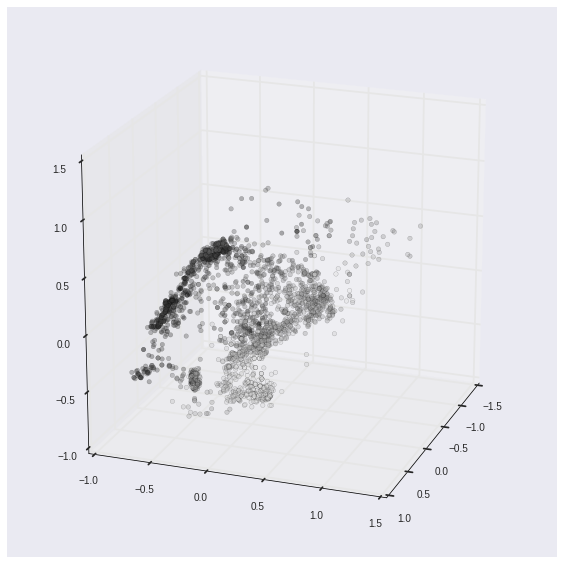

In [12]:
# plot four-corner embedding of the four instruments in all configs

from mpl_toolkits.mplot3d import Axes3D

x = data['x_in'].T
y = data['y'].astype(float)
y /= y.max()

# for idx, (cfg, az) in enumerate(zip(cfgs, [45, 60, 145, 130])):
fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')
#     ax = fig.add_subplot(221 + idx, projection='3d')
ax.view_init(elev=20, azim=20)
#     ax.set_title("{}".format(cfg))
# for i, c, m in zip(icodes, colors, markers):
#     x = samples[cfg][mrg][i]
#     a = 0.2 if i == 'else' else 0.75
#     n = 500 if i == 'else' else 200
#     x = x[:,np.random.permutation(x.shape[1])[:n]]
# for y_i in np.unique(data['y'])
yz = 0.1 + np.zeros_like(y)
c = np.array([y*.9]*3).T
ax.scatter3D(x[0], x[1], x[2], c=c, marker='o', s=20, alpha=0.35)

# plt.legend(loc="best")
plt.tight_layout()
# plt.show()
#     fig.savefig(fmt.format(cfg=cfg), transparent=True)
    

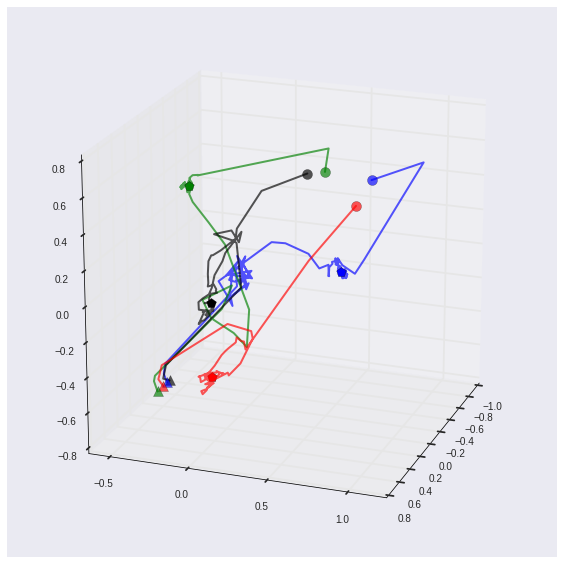

In [13]:
fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')

ax.view_init(elev=20, azim=20)
alpha = 0.66

for c, i in zip('bgkrycwm', ['trc', 'tp', 'sxt', 'klb']):
    row = res[res.instrument == i].iloc[1]
    z_out = np.load(row.prediction)['z_out'].T
    ax.plot3D(z_out[0], z_out[1], z_out[2], c, linewidth=2, 
              alpha=alpha)
    ax.scatter3D(z_out[0, 0], z_out[1, 0], z_out[2, 0],
                 s=100, marker='o', c=c, alpha=alpha)
    z_med = np.median(z_out, axis=1)
    ax.scatter3D(z_med[0], z_med[1], z_med[2],
                 s=100, marker='p', c=c, alpha=1)
    ax.scatter3D(z_out[0, -1], z_out[1, -1], z_out[2, -1],
                 s=100, marker='^', c=c, alpha=alpha)

# x_in = np.load(row.features)['cqt'].squeeze()
# fig = plt.figure(figsize=(8, 8))
# ax = fig.gca()
# ax.imshow(x_in.T, **pltargs)

plt.tight_layout()
plt.show()


fcode                           5cc0b3956950059495b0817fa4c5f000
features       /media/ejhumphrey/workspace/icml-dml/features/...
inst_note                                                 trc_55
instrument                                                   trc
note_number                                                   55
prediction     /media/ejhumphrey/workspace/icml-dml/outputs/i...
Name: trc_55_5cc0b3956950059495b0817fa4c5f000, dtype: object
fcode                           6547a6ed0b8db04d85507792de52d208
features       /media/ejhumphrey/workspace/icml-dml/features/...
inst_note                                                  tp_30
instrument                                                    tp
note_number                                                   30
prediction     /media/ejhumphrey/workspace/icml-dml/outputs/i...
Name: tp_30_6547a6ed0b8db04d85507792de52d208, dtype: object
fcode                           02cf75ced0d9d563ab565252e53d69a5
features       /media/ejhumphrey/w

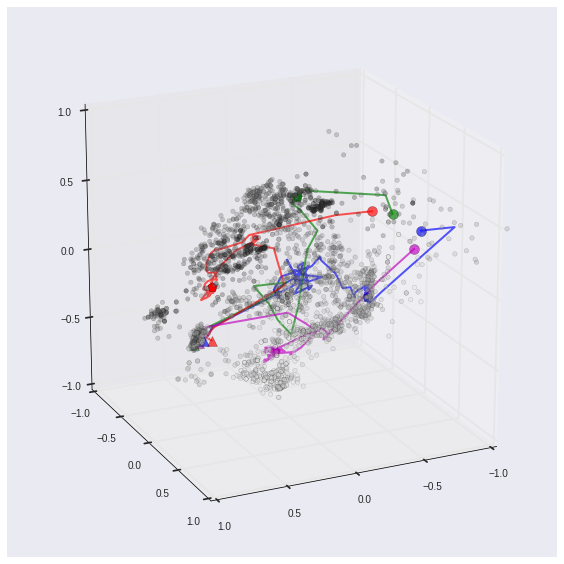

In [14]:
# plot four-corner embedding of the four instruments in all configs



x = data['x_in'].T
y = data['y'].astype(float)
y /= y.max()

# for idx, (cfg, az) in enumerate(zip(cfgs, [45, 60, 145, 130])):
fig = plt.figure(figsize=(8, 8))
ax = fig.gca(projection='3d')
#     ax = fig.add_subplot(221 + idx, projection='3d')
# ax.view_init(elev=20, azim=20)
#     ax.set_title("{}".format(cfg))
# for i, c, m in zip(icodes, colors, markers):
#     x = samples[cfg][mrg][i]
#     a = 0.2 if i == 'else' else 0.75
#     n = 500 if i == 'else' else 200
#     x = x[:,np.random.permutation(x.shape[1])[:n]]
# for y_i in np.unique(data['y'])
yz = 0.1 + np.zeros_like(y)
c = np.array([y*.9]*3).T
ax.scatter3D(x[0], x[1], x[2], c=c, marker='o', s=20, alpha=0.3)

plt.legend(loc="best")
plt.tight_layout()
# plt.show()
#     fig.savefig(fmt.format(cfg=cfg), transparent=True)

# fig = plt.figure(figsize=(8, 8))
# ax = fig.gca(projection='3d')

ax.view_init(elev=20, azim=65)
alpha = 0.66

for c, i in zip('bgrm', ['trc', 'tp', 'sxt', 'klb']):
    row = res[res.instrument == i].iloc[1]
    print(row)
    z_out = np.load(row.prediction)['z_out'].T
    ax.plot3D(z_out[0], z_out[1], z_out[2], c, linewidth=2, 
              alpha=alpha)
    ax.scatter3D(z_out[0, 0], z_out[1, 0], z_out[2, 0],
                 s=100, marker='o', c=c, alpha=alpha)
    z_med = np.median(z_out, axis=1)
    ax.scatter3D(z_med[0], z_med[1], z_med[2],
                 s=100, marker='p', c=c, alpha=1)
    ax.scatter3D(z_out[0, -1], z_out[1, -1], z_out[2, -1],
                 s=100, marker='^', c=c, alpha=alpha)

# x_in = np.load(row.features)['cqt'].squeeze()
# fig = plt.figure(figsize=(8, 8))
# ax = fig.gca()
# ax.imshow(x_in.T, **pltargs)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)
plt.tight_layout()
# plt.show()

fig.savefig("/home/ejhumphrey/src/icml16-dml/paper/inst-pitch-d2_adsr.png", 
            transparent=True)

In [8]:
def embedding_batches(holdout_index, full_set, num_items=500, seed=123):
    rng = np.random.RandomState(seed=seed)
    index = holdout_index.tolist()
    rng.shuffle(index)
    holdout_set = full_set.loc[index[:num_items]]
    print(holdout_set.shape)
    nbs = D.pitch_neighbors(holdout_set)
    cstream = D.class_stream(nbs, holdout_set, with_meta=True)
    return D.pescador.buffer_batch(D.class_stream(nbs, holdout_set), buffer_size=2500)

In [15]:
def draw_data(data, rows, elev=20, azim=65, savefig=''):
    x = data['x_in'].T
    y = data['y'].astype(float)
    y /= y.max()

    fig = plt.figure(figsize=(8, 8))
    ax = fig.gca(projection='3d')
    yz = 0.1 + np.zeros_like(y)
    c = np.array([y*.9]*3).T
    ax.scatter3D(x[0], x[1], x[2], c=c, marker='o', s=20, alpha=0.3)
    
    max_val = max([np.abs(x).max(), 1])
    plt.legend(loc="best")
    plt.tight_layout()
    
    ax.view_init(elev=elev, azim=azim)
    alpha = 0.66

    for c, (_, row) in zip('bgrm', rows.iterrows()):
        z_out = np.load(row.prediction)['z_out'].T
        max_val = max([max_val, np.abs(z_out).max()])
        ax.plot3D(z_out[0], z_out[1], z_out[2], c, linewidth=2, 
                  alpha=alpha)
        ax.scatter3D(z_out[0, 0], z_out[1, 0], z_out[2, 0],
                     s=100, marker='o', c=c, alpha=alpha)
        z_med = np.median(z_out, axis=1)
        ax.scatter3D(z_med[0], z_med[1], z_med[2],
                     s=100, marker='p', c=c, alpha=1)
        ax.scatter3D(z_out[0, -1], z_out[1, -1], z_out[2, -1],
                     s=100, marker='^', c=c, alpha=alpha)
    
    
    ax.set_xlim(-max_val, max_val)
    ax.set_ylim(-max_val, max_val)
    ax.set_zlim(-max_val, max_val)
    plt.tight_layout()
    
#     if savefig:
#         fig.savefig(savefig, transparent=True)
    return fig, ax

In [4]:
df = pd.read_json(
    "/media/ejhumphrey/workspace/icml-dml/embeddings"
    "/instpitch-000-050000-20160611_23h46m35s/output_index.json")

In [5]:
batches = embedding_batches(test.index, df, 500, 123)

(500, 6)


In [6]:
data = next(batches)

In [23]:
idx = [random.choice(df[df.inst_note == k].index.tolist()) 
       for k in ('trc_48', 'trc_60', 'trc_72')]
print(idx)

[u'trc_48_5d39bbea3448835fd58bd251c250c143', u'trc_60_eeb135f9c72c330e26e26687536f7257', u'trc_72_f5fb3b6fd42108418d636536ca7be4df']


In [32]:
# Instpitch embedding
df = pd.read_json(
    "/media/ejhumphrey/workspace/icml-dml/embeddings"
    "/instpitch-000-050000-20160611_23h46m35s/output_index.json")
batches = embedding_batches(test.index, df, 500, 123)
data = next(batches)

fcode                           5d39bbea3448835fd58bd251c250c143
features       /media/ejhumphrey/workspace/icml-dml/features/...
inst_note                                                 trc_48
instrument                                                   trc
note_number                                                   48
prediction     /media/ejhumphrey/workspace/icml-dml/embedding...
Name: trc_48_5d39bbea3448835fd58bd251c250c143, dtype: object
fcode                           eeb135f9c72c330e26e26687536f7257
features       /media/ejhumphrey/workspace/icml-dml/features/...
inst_note                                                 trc_60
instrument                                                   trc
note_number                                                   60
prediction     /media/ejhumphrey/workspace/icml-dml/embedding...
Name: trc_60_eeb135f9c72c330e26e26687536f7257, dtype: object
fcode                           f5fb3b6fd42108418d636536ca7be4df
features       /media/ejhumphrey/

In [25]:
idx = [random.choice(df[df.inst_note == k].index.tolist()) 
       for k in ('trc_48', 'trc_60', 'trc_72')]

fig, ax = draw_data(data, df.loc[idx], elev=20, azim=20)
ax.set_title("Trumpet - C4, C5, C6")
fig.savefig("/home/ejhumphrey/src/icml16-dml/figures/instpitch_trc48-60-72.png",
            transparent=True)
plt.show()

<generator object iterrows at 0x9ec19f04>

In [42]:
idx = [random.choice(df[df.inst_note == k].index.tolist()) 
       for k in ('trc_48', 'afl_48', 'vi_48')]
fig, ax = draw_data(data, df.loc[idx], elev=20, azim=5)
ax.set_title("C4 - Trumpet, Alto Flute, Violin")
fig.savefig("/home/ejhumphrey/src/icml16-dml/figures/instpitch_48_trc-afl-vi.png",
            transparent=True)
plt.show()

fcode                           fc5b091c245ef9a81aa7693be77c6035
features       /media/ejhumphrey/workspace/icml-dml/features/...
inst_note                                                 trc_48
instrument                                                   trc
note_number                                                   48
prediction     /media/ejhumphrey/workspace/icml-dml/embedding...
Name: trc_48_fc5b091c245ef9a81aa7693be77c6035, dtype: object
fcode                           c5f3cb218a29f2c6bb7dd0b8aba103a1
features       /media/ejhumphrey/workspace/icml-dml/features/...
inst_note                                                 afl_48
instrument                                                   afl
note_number                                                   48
prediction     /media/ejhumphrey/workspace/icml-dml/embedding...
Name: afl_48_c5f3cb218a29f2c6bb7dd0b8aba103a1, dtype: object
fcode                           fc53e3f6b0c5648e3a45961b2ff04cd2
features       /media/ejhumphrey/

In [12]:
# Instrument embedding
df = pd.read_json(
    "/media/ejhumphrey/workspace/icml-dml/embeddings"
    "/instrument-000-050000-20160611_18h21m39s/output_index.json")
batches = embedding_batches(test.index, df, 1000, 123)
inst_data = next(batches)

(1000, 6)


In [16]:
idx = [random.choice(df[df.inst_note == k].index.tolist()) 
       for k in ('trc_48', 'trc_60', 'trc_72')]

fig, ax = draw_data(inst_data, df.loc[idx], elev=20, azim=20)
ax.set_title("Trumpet - C4, C5, C6")
# fig.savefig("/home/ejhumphrey/src/icml16-dml/figures/instpitch_trc48-60-72.png",
#             transparent=True)
plt.show()

In [19]:
def fig_to_ndarray(fig, **kwargs):
    buffer_ = StringIO()
    fig.savefig(buffer_, format="png", **kwargs)
    buffer_.seek(0)
    image = PIL.Image.open(buffer_)
    arr = np.asarray(image)
    buffer_.close()
    return arr

In [27]:
def draw_rotated_data(data, rows, elev=20, azim_step=5, fps=12, savefig=''):
    x = data['x_in'].T
    y = data['y'].astype(float)
    y /= y.max()

    fig = plt.figure(figsize=(8, 8))
    ax = fig.gca(projection='3d')
    yz = 0.1 + np.zeros_like(y)
    c = np.array([y*.9]*3).T
    ax.scatter3D(x[0], x[1], x[2], c=c, marker='o', s=20, alpha=0.3)
    
    max_val = max([np.abs(x).max(), 1])
    plt.legend(loc="best")
    plt.tight_layout()
    
    alpha = 0.66

    for c, (_, row) in zip('bgrm', rows.iterrows()):
        z_out = np.load(row.prediction)['z_out'].T
        max_val = max([max_val, np.abs(z_out).max()])
        ax.plot3D(z_out[0], z_out[1], z_out[2], c, linewidth=2, 
                  alpha=alpha)
        ax.scatter3D(z_out[0, 0], z_out[1, 0], z_out[2, 0],
                     s=100, marker='o', c=c, alpha=alpha)
        z_med = np.median(z_out, axis=1)
        ax.scatter3D(z_med[0], z_med[1], z_med[2],
                     s=100, marker='p', c=c, alpha=1)
        ax.scatter3D(z_out[0, -1], z_out[1, -1], z_out[2, -1],
                     s=100, marker='^', c=c, alpha=alpha)
    
    
    ax.set_xlim(-max_val, max_val)
    ax.set_ylim(-max_val, max_val)
    ax.set_zlim(-max_val, max_val)
    plt.tight_layout()
    
    frames = []
    pbar = progressbar.ProgressBar(max_value=360).start()
    for az in np.arange(0, 360, azim_step):
        pbar.update(az)
        ax.view_init(elev=elev, azim=az)
        fig.canvas.draw()
        frames += [fig_to_ndarray(fig, transparent=True)]
    
    imageio.mimwrite(savefig, frames, fps=fps, palettesize=256)
    

In [28]:
idx = [random.choice(df[df.inst_note == k].index.tolist()) 
       for k in ('trc_48', 'trc_60', 'trc_72')]

draw_rotated_data(
    inst_data, df.loc[idx], elev=20, 
    azim_step=5, fps=12.0,
    savefig='figures/inst-trc-C456.gif')

 98% (355 of 360) |################################################ | Elapsed Time: 0:00:42 Elapsed Time: 0:00:42

In [29]:
idx = [random.choice(df[df.inst_note == k].index.tolist()) 
       for k in ('trc_48', 'afl_48', 'vi_48')]

draw_rotated_data(
    inst_data, df.loc[idx], elev=20, 
    azim_step=5, fps=12.0,
    savefig='figures/instrument-000_trc_48,afl_48,vi_48.gif')

 98% (355 of 360) |################################################ | Elapsed Time: 0:00:42 Elapsed Time: 0:00:42

In [30]:
# Pitch embedding
df = pd.read_json(
    "/media/ejhumphrey/workspace/icml-dml/embeddings"
    "/pitch-000-050000-20160611_21h02m48s/output_index.json")
batches = embedding_batches(test.index, df, 1000, 123)
pitch_data = next(batches)

(1000, 6)


In [34]:
idx = [random.choice(df[df.inst_note == k].index.tolist()) 
       for k in ('trc_48', 'trc_60', 'trc_72')]

draw_rotated_data(
    pitch_data, df.loc[idx], elev=20, 
    azim_step=5, fps=12.0,
    savefig='figures/pitch-000_trc_48,trc_60,trc_72.gif')

 98% (355 of 360) |################################################ | Elapsed Time: 0:00:42 Elapsed Time: 0:00:42

In [35]:
idx = [random.choice(df[df.inst_note == k].index.tolist()) 
       for k in ('trc_48', 'afl_48', 'vi_48')]

draw_rotated_data(
    pitch_data, df.loc[idx], elev=20, 
    azim_step=5, fps=12.0,
    savefig='figures/pitch-000_trc_48,afl_48,vi_48.gif')

 98% (355 of 360) |################################################ | Elapsed Time: 0:00:42 Elapsed Time: 0:00:42

In [33]:
# Instrument-Pitch embedding
df = pd.read_json(
    "/media/ejhumphrey/workspace/icml-dml/embeddings"
    "/instpitch-000-050000-20160611_23h46m35s/output_index.json")
batches = embedding_batches(test.index, df, 1000, 123)
instpitch_data = next(batches)

(1000, 6)


In [36]:
idx = [random.choice(df[df.inst_note == k].index.tolist()) 
       for k in ('trc_48', 'trc_60', 'trc_72')]

draw_rotated_data(
    instpitch_data, df.loc[idx], elev=20, 
    azim_step=5, fps=12.0,
    savefig='figures/instpitch-000_trc_48,trc_60,trc_72.gif')

 98% (355 of 360) |################################################ | Elapsed Time: 0:00:40 Elapsed Time: 0:00:40

In [37]:
idx = [random.choice(df[df.inst_note == k].index.tolist()) 
       for k in ('trc_48', 'afl_48', 'vi_48')]

draw_rotated_data(
    instpitch_data, df.loc[idx], elev=20, 
    azim_step=5, fps=12.0,
    savefig='figures/instpitch-000_trc_48,afl_48,vi_48.gif')

 98% (355 of 360) |################################################ | Elapsed Time: 0:00:40 Elapsed Time: 0:00:40

In [38]:
# Instrument-Pitch embedding
df = pd.read_json(
    "/media/ejhumphrey/workspace/icml-dml/embeddings"
    "/instpitch-d2-000-050000-20160612_02h32m03s/output_index.json")
batches = embedding_batches(test.index, df, 1000, 123)
instpitch2_data = next(batches)

(1000, 6)


In [40]:
idx = [random.choice(df[df.inst_note == k].index.tolist()) 
       for k in ('trc_48', 'trc_60', 'trc_72')]

draw_rotated_data(
    instpitch2_data, df.loc[idx], elev=20, 
    azim_step=5, fps=12.0,
    savefig='figures/instpitch-d2-000_trc_48,trc_60,trc_72.gif')

 98% (355 of 360) |################################################ | Elapsed Time: 0:00:43 Elapsed Time: 0:00:43

In [43]:
ikeys = ('trc_48', 'tp_48', 'tu_48', 'ho_48')
idx = [random.choice(df[df.inst_note == k].index.tolist()) 
       for k in ikeys]

draw_rotated_data(
    instpitch2_data, df.loc[idx], elev=20, 
    azim_step=5, fps=12.0,
    savefig='figures/instpitch-d2-000_{}.gif'.format(",".join(ikeys)))

 98% (355 of 360) |################################################ | Elapsed Time: 0:00:42 Elapsed Time: 0:00:42